# Exploratory Data Analysis, PCA, and Clustering Assignment

### Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score 

In [39]:
# Load the dataset
data = pd.read_csv('wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
# Basic data exploration
print("Data Shape:", data.shape)
print("Data Info:")
print(data.info())
statistics_summary = data.describe()
print("Statistics summary:\n", statistics_summary) 

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64
Data Shape: (178, 14)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-nu

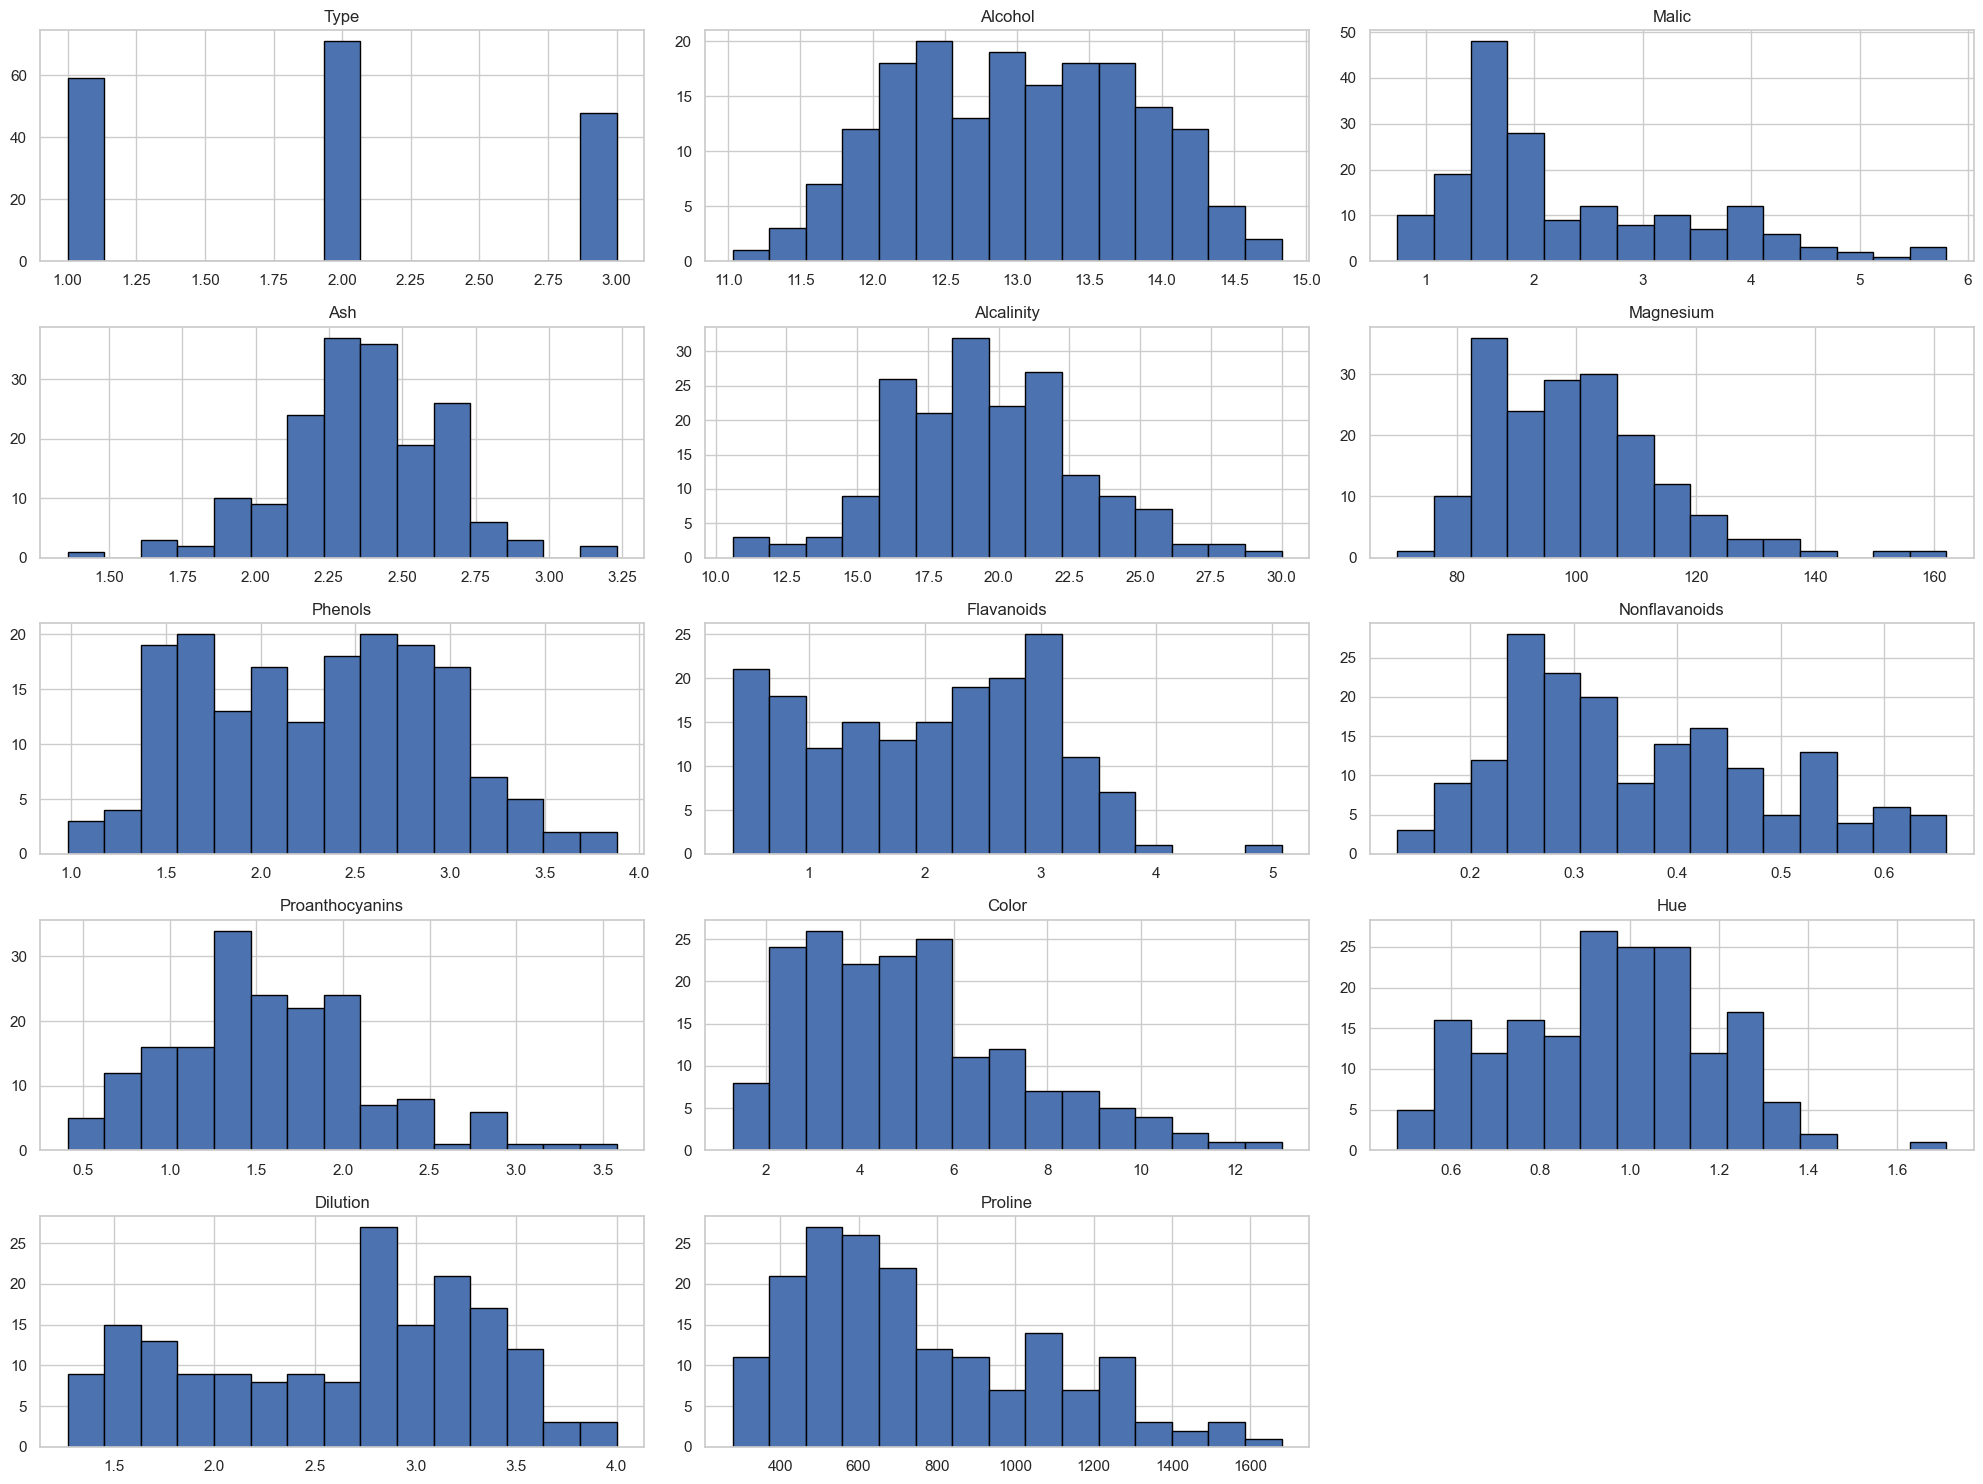

In [44]:
# Examine distribution of features
# Histograms
sns.set(style='whitegrid')
data.hist(figsize=(20, 15), bins=15, layout=(5, 3), edgecolor='black')
plt.tight_layout()
plt.show()   

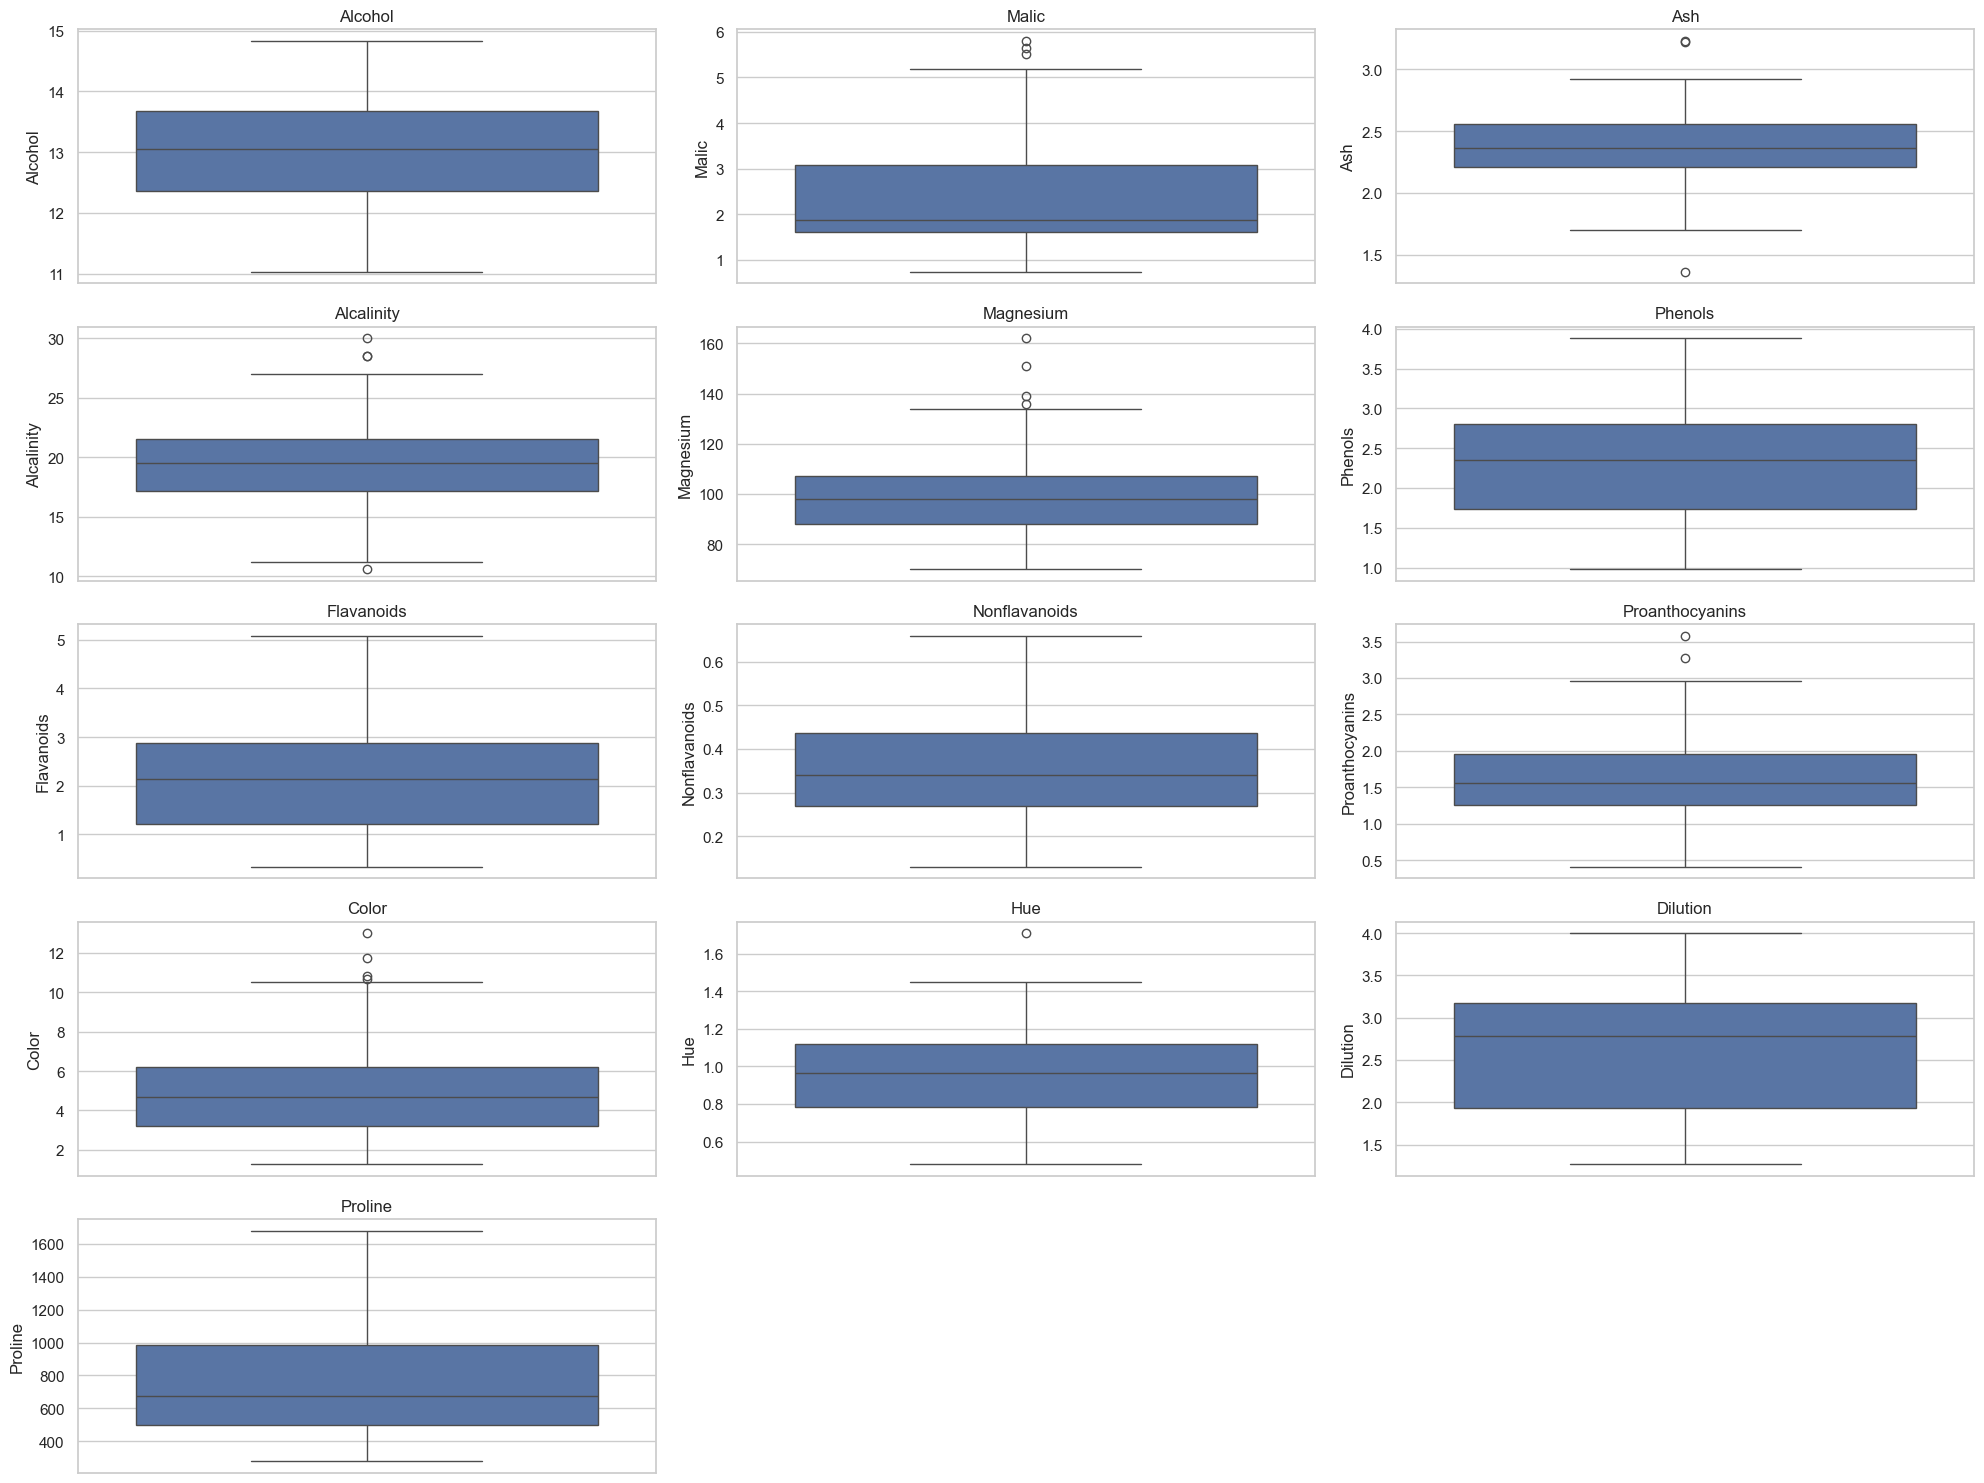

In [50]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

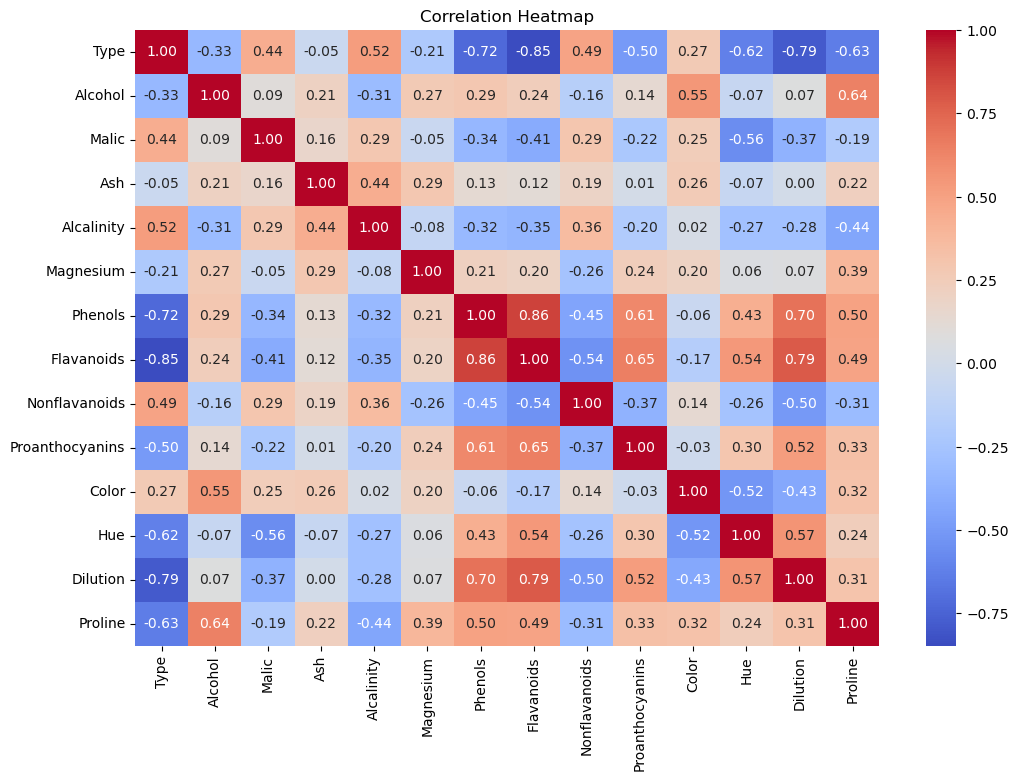

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Task 2: Dimensionality Reduction with PCA

In [64]:
# Standardize the features
X = data.drop('Type', axis=1)
y = data['Type']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [75]:
# PCA implementation
pca = PCA()
data_pca=pca.fit_transform(data_scaled)
print(data_pca)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 ... -4.51563395e-01
   5.40810414e-01 -6.62386309e-02]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 ... -1.42657306e-01
   3.88237741e-01  3.63650247e-03]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01 ... -2.86672847e-01
   5.83573183e-04  2.17165104e-02]
 ...
 [-2.67783946e+00 -2.76089913e+00 -9.40941877e-01 ...  5.12492025e-01
   6.98766451e-01  7.20776948e-02]
 [-2.38701709e+00 -2.29734668e+00 -5.50696197e-01 ...  2.99821968e-01
   3.39820654e-01 -2.18657605e-02]
 [-3.20875816e+00 -2.76891957e+00  1.01391366e+00 ... -2.29964331e-01
  -1.88787963e-01 -3.23964720e-01]]


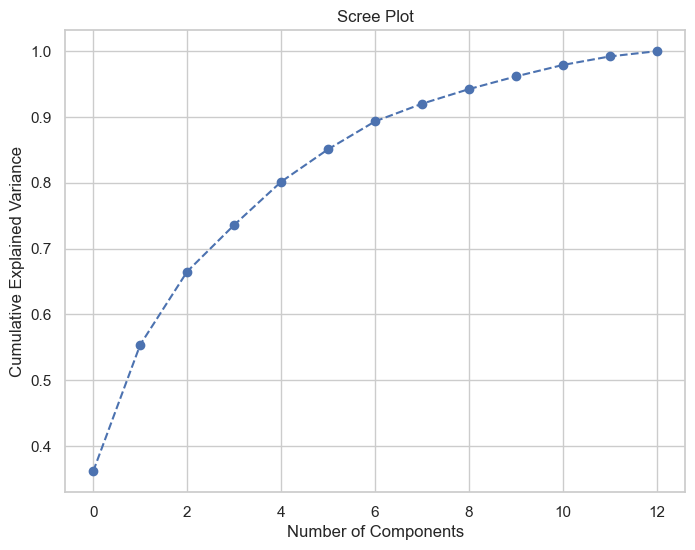

In [74]:
# Scree plot (explained variance plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [53]:
# Determine the optimal number of components using cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")
    

Optimal number of components to retain 95% variance: 10


### Task 3: Clustering with Original Data

In [76]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)
print(kmeans)
clusters_original

KMeans(n_clusters=3, random_state=42)


C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

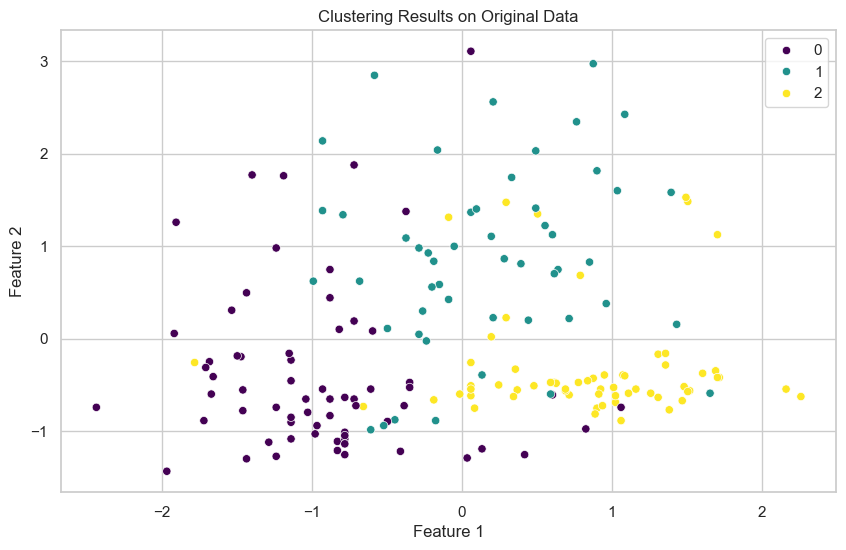

In [56]:
# Visualize the clustering results using appropriate plots.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_original , palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results on Original Data')
plt.show()

In [19]:
# Evaluate clustering performance using Silhouette Score and Davies-Bouldin Index
sil_original = silhouette_score(data_scaled, clusters_original)
db_original = davies_bouldin_score(data_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {sil_original}")
print(f"Davies-Bouldin Index (Original Data): {db_original}")

Silhouette Score (Original Data): 0.3493563848593293
Davies-Bouldin Index (Original Data): 1.184307462636283


### Task 4: Clustering with PCA Data

C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


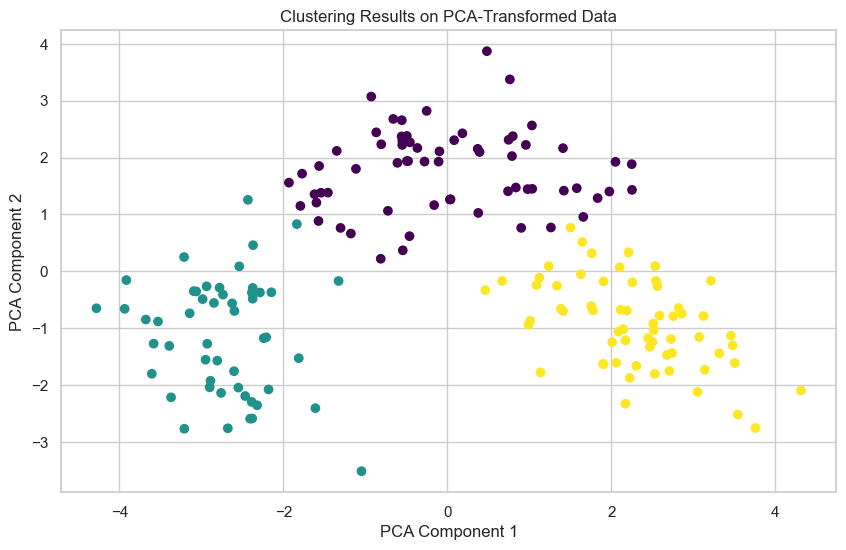

In [57]:
# Apply K-means clustering on PCA-transformed data
clusters_pca = kmeans.fit_predict(data_pca)

# Visualize the clustering results (for first two components)
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

In [58]:
# Evaluate clustering performance on PCA data
sil_pca = silhouette_score(data_pca, clusters_pca)
db_pca = davies_bouldin_score(data_pca, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")

Silhouette Score (PCA Data): 0.2986748294369291
Davies-Bouldin Index (PCA Data): 1.3363263335155764


### Task 5: Comparison and Analysis

In [63]:
print("\nComparison of Clustering Results:")
print(f"Silhouette Score (Original Data): {sil_original}")
print(f"Davies-Bouldin Index (Original Data): {db_original}")
print(f"Silhouette Score (PCA Data): {sil_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")


Comparison of Clustering Results:
Silhouette Score (Original Data): 0.3493563848593293
Davies-Bouldin Index (Original Data): 1.184307462636283
Silhouette Score (PCA Data): 0.2986748294369291
Davies-Bouldin Index (PCA Data): 1.3363263335155764


### Task 6: Conclusion and Insights

In [77]:
# Discuss practical implications
print("Practical Implications:")
print("- PCA can significantly reduce the dimensionality of the data, making it easier to visualize and interpret.")
print("- Clustering on PCA-transformed data can yield similar or even improved performance compared to the original data.")

Practical Implications:
- PCA can significantly reduce the dimensionality of the data, making it easier to visualize and interpret.
- Clustering on PCA-transformed data can yield similar or even improved performance compared to the original data.


In [78]:
# Provide recommendations
print("Recommendations:")
print("- Use PCA when dealing with high-dimensional data to reduce computational complexity and improve clustering performance.")
print("- Consider clustering directly on the original data if the number of features is manageable and interpretability of the original features is important.")

Recommendations:
- Use PCA when dealing with high-dimensional data to reduce computational complexity and improve clustering performance.
- Consider clustering directly on the original data if the number of features is manageable and interpretability of the original features is important.
